In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Datasets and display Frist Few Rows

In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Analysis data Goal is to look what factors affect the exam score

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Check For Duplicated Data

In [7]:
df.duplicated().sum()

0

### Check For Missing Values

In [9]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

#### the data has missing value on column teacher quality,parental education level and distance from home, if we look into the type of data, type of data is categorikal, beside of that we need to remove the value of the data which has missing value, and we look datatype nothing wrong

In [11]:
df[df.isnull().any(axis=1)].head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68


### Drop Missing Values

In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

### Change Categorycal Data into category data types

In [15]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [16]:
categorical_columns = ['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender']

for col in categorical_columns:
    df[col] = df[col].astype("category")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6378 non-null   int64   
 1   Attendance                  6378 non-null   int64   
 2   Parental_Involvement        6378 non-null   category
 3   Access_to_Resources         6378 non-null   category
 4   Extracurricular_Activities  6378 non-null   category
 5   Sleep_Hours                 6378 non-null   int64   
 6   Previous_Scores             6378 non-null   int64   
 7   Motivation_Level            6378 non-null   category
 8   Internet_Access             6378 non-null   category
 9   Tutoring_Sessions           6378 non-null   int64   
 10  Family_Income               6378 non-null   category
 11  Teacher_Quality             6378 non-null   category
 12  School_Type                 6378 non-null   category
 13  Peer_Influence         

### Descriptive Statistics

In [19]:
df.describe(include="all")

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378,6378,6378,6378.000000,6378.000000,6378,6378,6378.000000,6378,6378,6378,6378,6378.000000,6378,6378,6378,6378,6378.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3251,3204,3807,NaN,NaN,3237,5893,NaN,2582,3826,4434,2553,NaN,5710,3159,3801,3688,NaN
mean,19.977109,80.020853,NaN,NaN,NaN,7.034964,75.066165,NaN,NaN,1.495296,NaN,NaN,NaN,NaN,2.972719,NaN,NaN,NaN,NaN,67.252117
std,5.985460,11.550723,NaN,NaN,NaN,1.468033,14.400389,NaN,NaN,1.233984,NaN,NaN,NaN,NaN,1.028926,NaN,NaN,NaN,NaN,3.914217
min,1.000000,60.000000,NaN,NaN,NaN,4.000000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.000000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.000000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.000000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


#### the data has anomaly on exam score, maximum value of exam score is must to be 100, but any data has upper than 100 then we need to remove it

In [21]:
df = df[df["Exam_Score"] <= 100]

### distribution of numerical features

In [23]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


<Figure size 1500x1000 with 0 Axes>

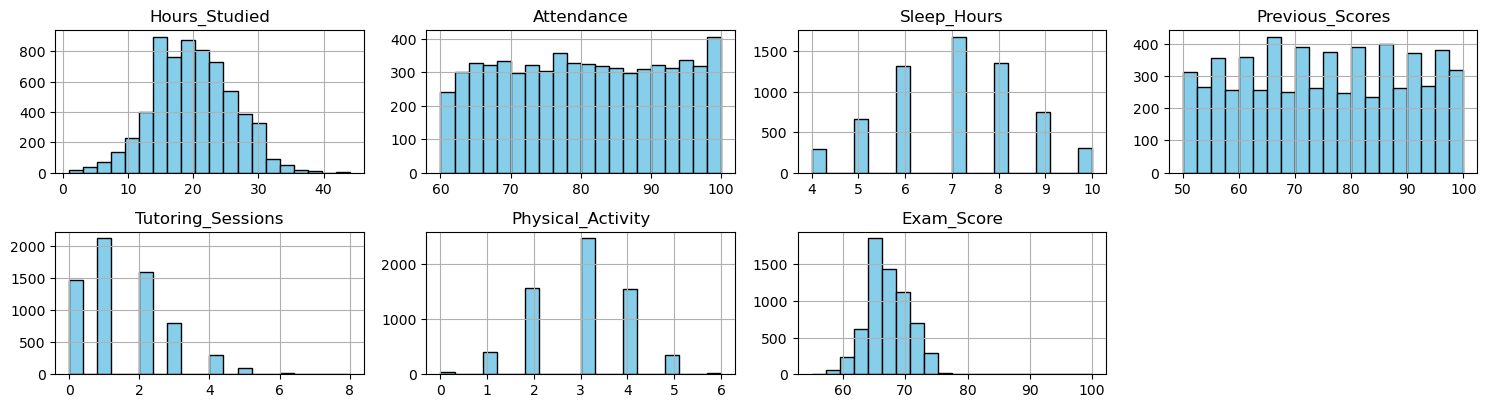

In [24]:
plt.figure(figsize=(15,10))
df.hist(bins=20,figsize=(15,10),layout=(5,4),color="skyblue",edgecolor="black")
plt.tight_layout()
plt.show()

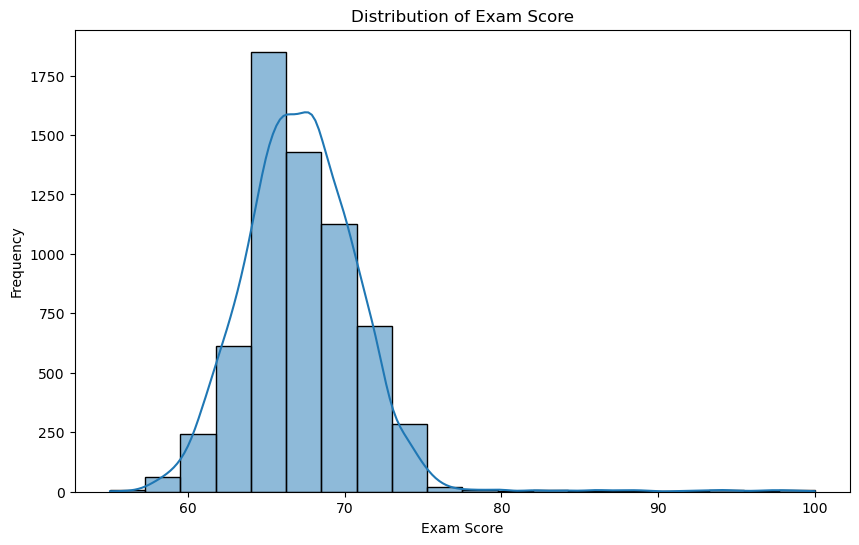

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df["Exam_Score"],kde=True,bins=20,)
plt.title("Distribution of Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

#### beside on visualitation above, most distribution data range exam in score is in the 60 - 75

### Distribution of Categorycal data

In [28]:
df.describe(include="all")

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6377.000000,6377.000000,6377,6377,6377,6377.000000,6377.000000,6377,6377,6377.000000,6377,6377,6377,6377,6377.000000,6377,6377,6377,6377,6377.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3251,3203,3806,NaN,NaN,3237,5893,NaN,2582,3826,4433,2552,NaN,5709,3158,3801,3688,NaN
mean,19.976008,80.018034,NaN,NaN,NaN,7.035126,75.063353,NaN,NaN,1.494747,NaN,NaN,NaN,NaN,2.972714,NaN,NaN,NaN,NaN,67.246825
std,5.985283,11.549434,NaN,NaN,NaN,1.468091,14.399766,NaN,NaN,1.233300,NaN,NaN,NaN,NaN,1.029006,NaN,NaN,NaN,NaN,3.891637
min,1.000000,60.000000,NaN,NaN,NaN,4.000000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.000000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.000000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.000000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


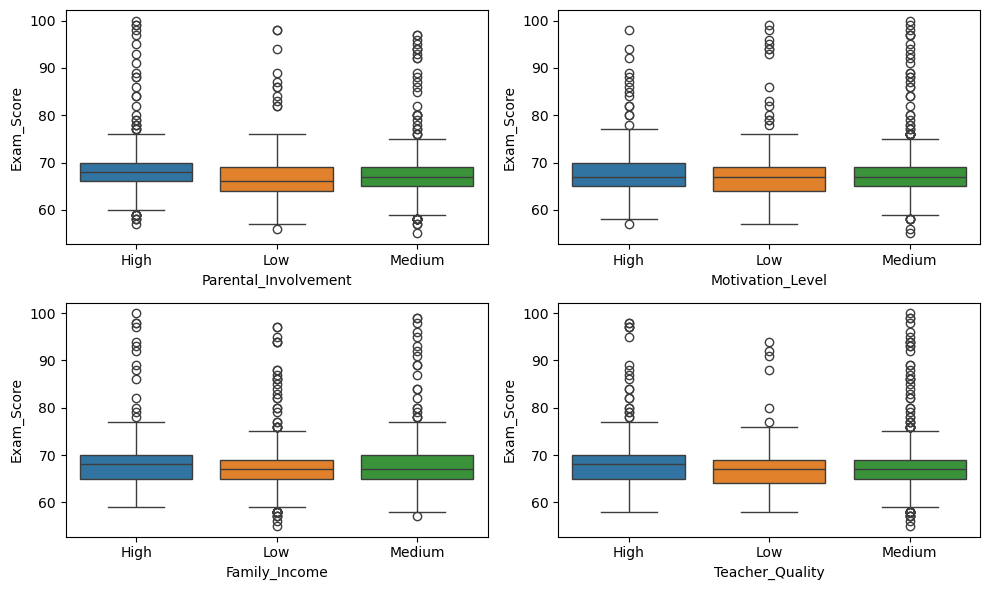

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(2, 2, 1)
sns.boxplot(data=df,x="Parental_Involvement",y="Exam_Score",hue="Parental_Involvement")
plt.subplot(2, 2, 2)
sns.boxplot(data=df,x="Motivation_Level",y="Exam_Score",hue="Motivation_Level")
plt.subplot(2, 2, 3)
sns.boxplot(data=df,x="Family_Income",y="Exam_Score",hue="Family_Income")
plt.subplot(2, 2, 4)
sns.boxplot(data=df,x="Teacher_Quality",y="Exam_Score",hue="Teacher_Quality")
plt.tight_layout()
plt.show()

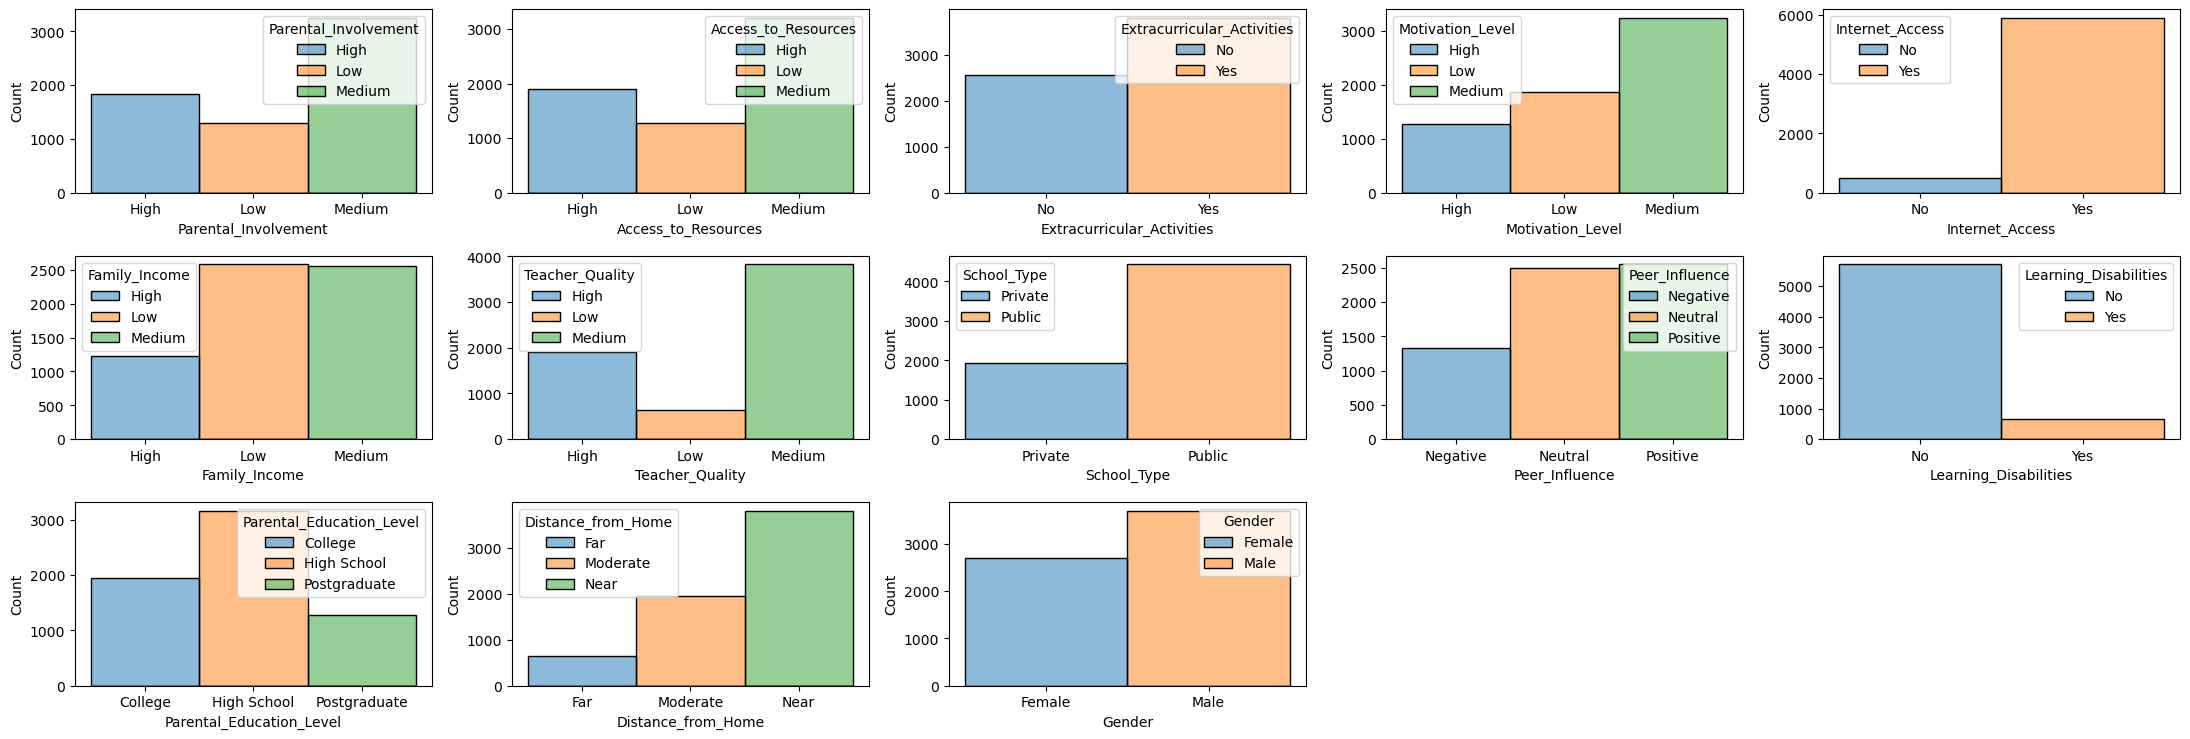

In [31]:
plt.figure(figsize=(22,12))
plt.subplot(5,5,1)
sns.histplot(data=df,x="Parental_Involvement",hue="Parental_Involvement")
plt.subplot(5,5,2)
sns.histplot(data=df,x="Access_to_Resources",hue="Access_to_Resources")
plt.subplot(5,5,3)
sns.histplot(data=df,x="Extracurricular_Activities",hue="Extracurricular_Activities")
plt.subplot(5,5,4)
sns.histplot(data=df,x="Motivation_Level",hue="Motivation_Level")
plt.subplot(5,5,5)
sns.histplot(data=df,x="Internet_Access",hue="Internet_Access")
plt.subplot(5,5,6)
sns.histplot(data=df,x="Family_Income",hue="Family_Income")
plt.subplot(5,5,7)
sns.histplot(data=df,x="Teacher_Quality",hue="Teacher_Quality")
plt.subplot(5,5,8)
sns.histplot(data=df,x="School_Type",hue="School_Type")
plt.subplot(5,5,9)
sns.histplot(data=df,x="Peer_Influence",hue="Peer_Influence")
plt.subplot(5,5,10)
sns.histplot(data=df,x="Learning_Disabilities",hue="Learning_Disabilities")
plt.subplot(5,5,11)
sns.histplot(data=df,x="Parental_Education_Level",hue="Parental_Education_Level")
plt.subplot(5,5,12)
sns.histplot(data=df,x="Distance_from_Home",hue="Distance_from_Home")
plt.subplot(5,5,13)
sns.histplot(data=df,x="Gender",hue="Gender")
plt.tight_layout()
plt.show()

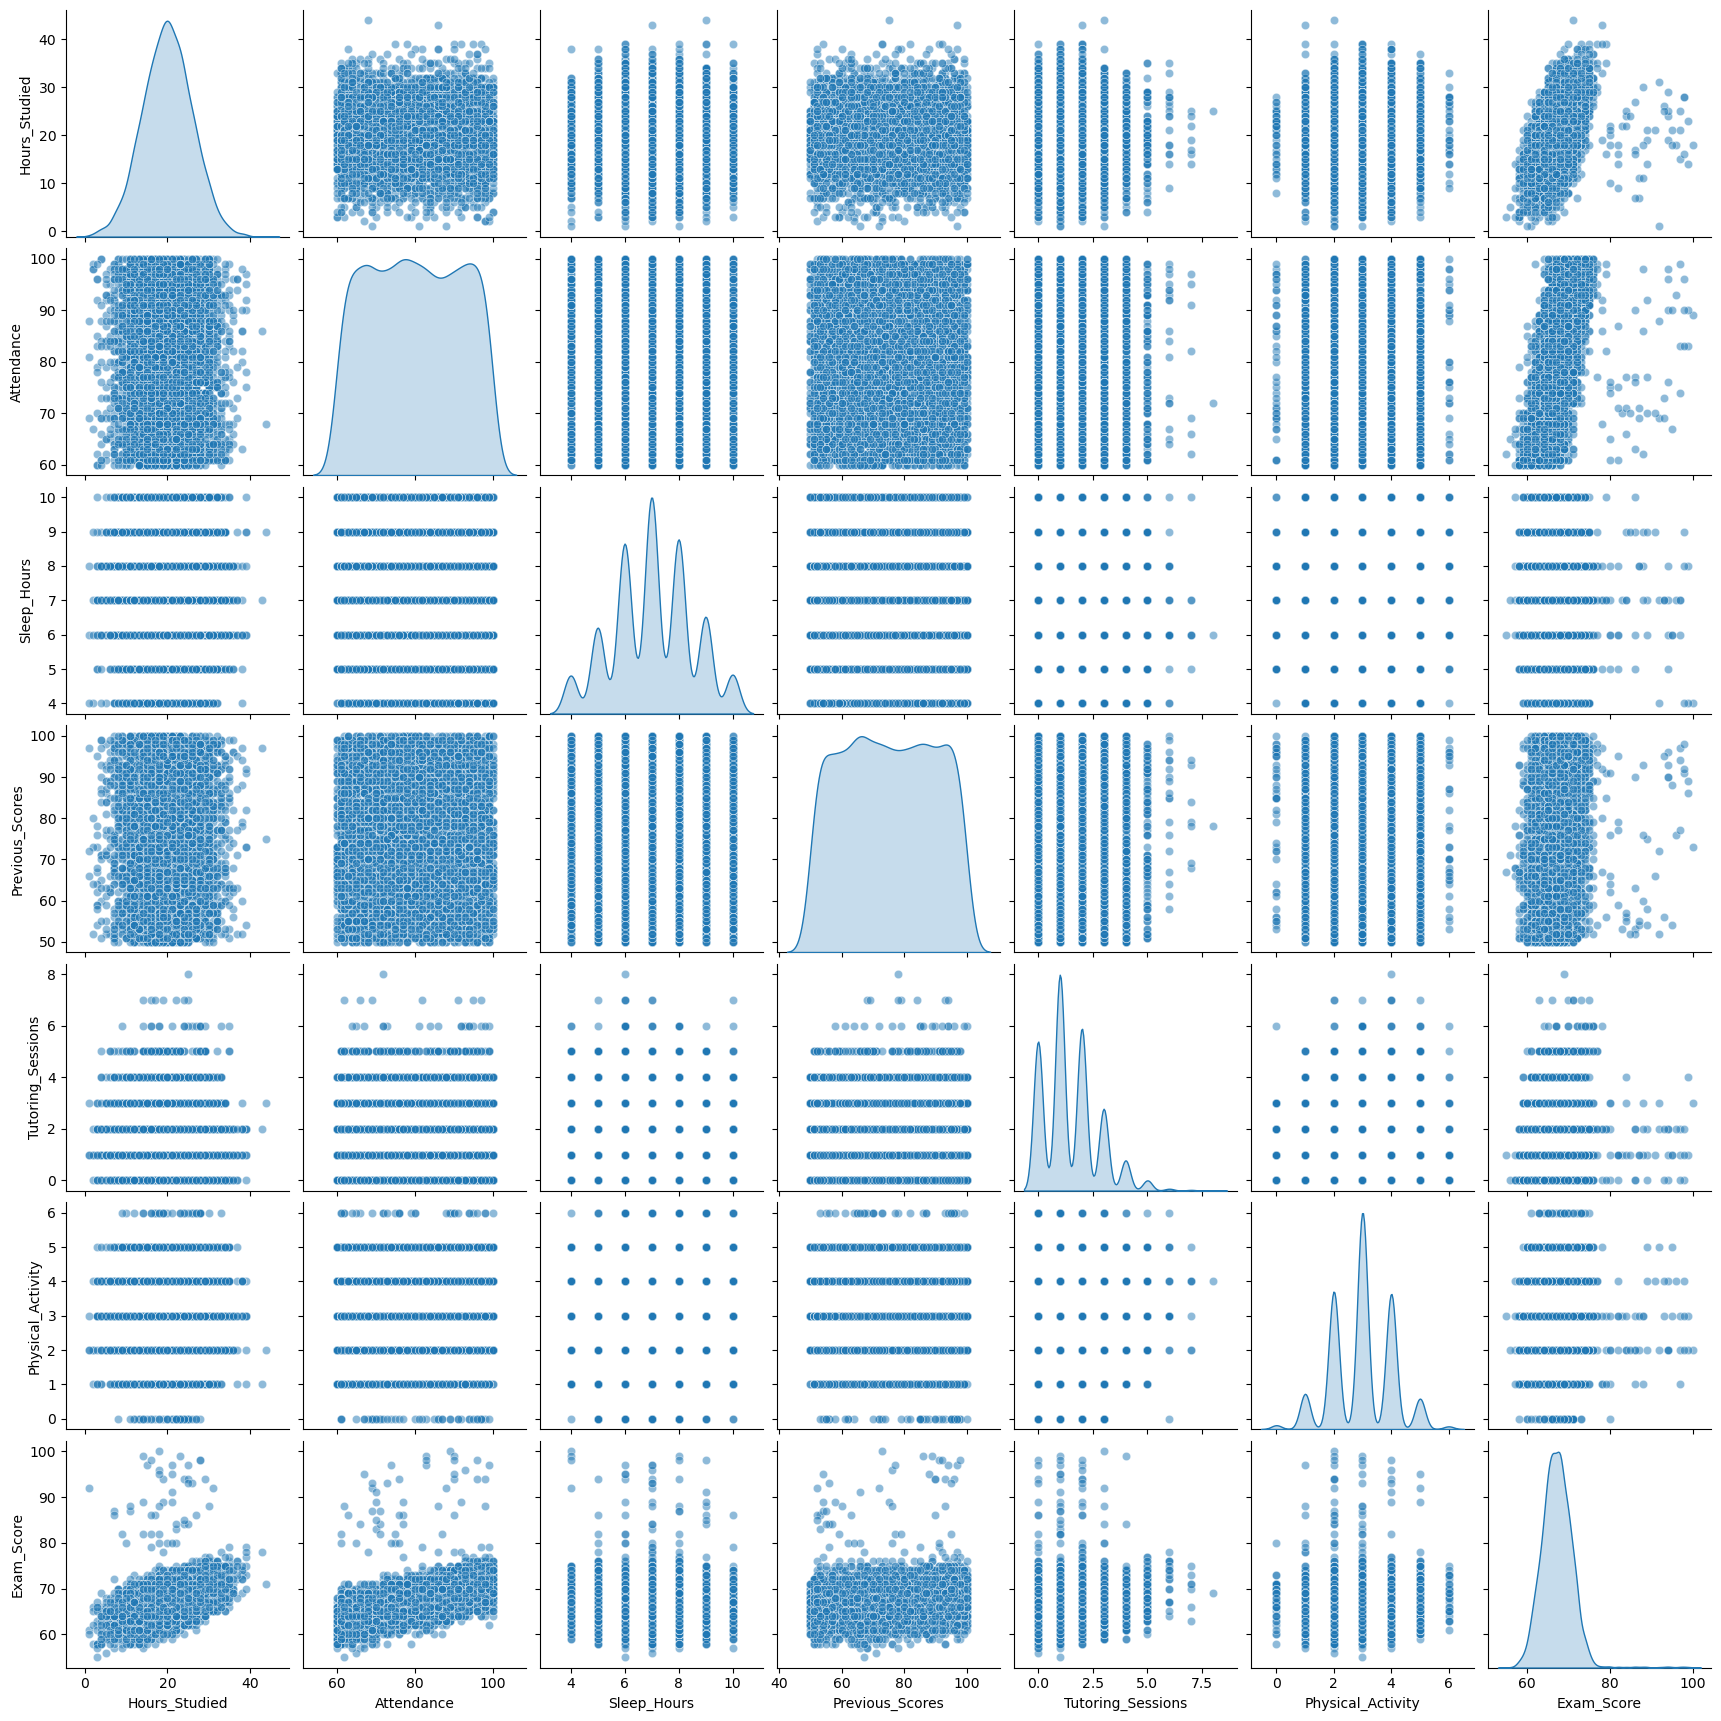

In [32]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

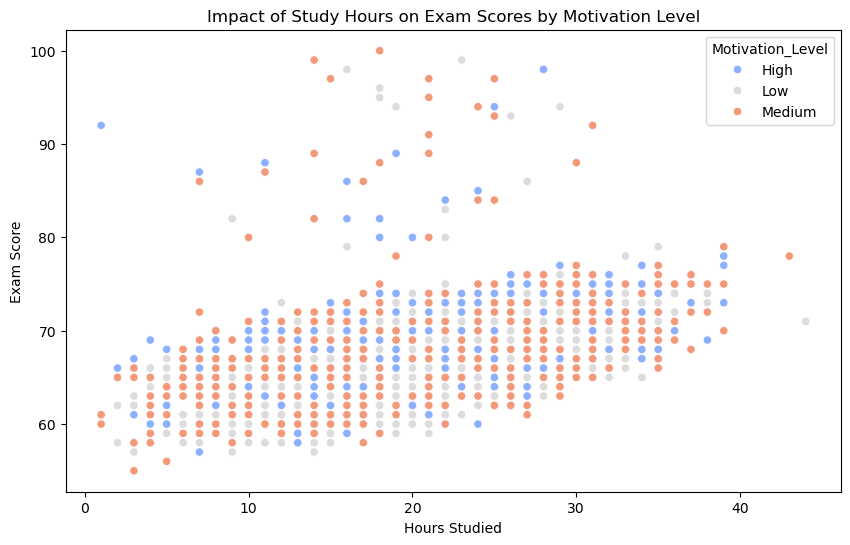

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, hue='Motivation_Level', palette='coolwarm')
plt.title('Impact of Study Hours on Exam Scores by Motivation Level')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

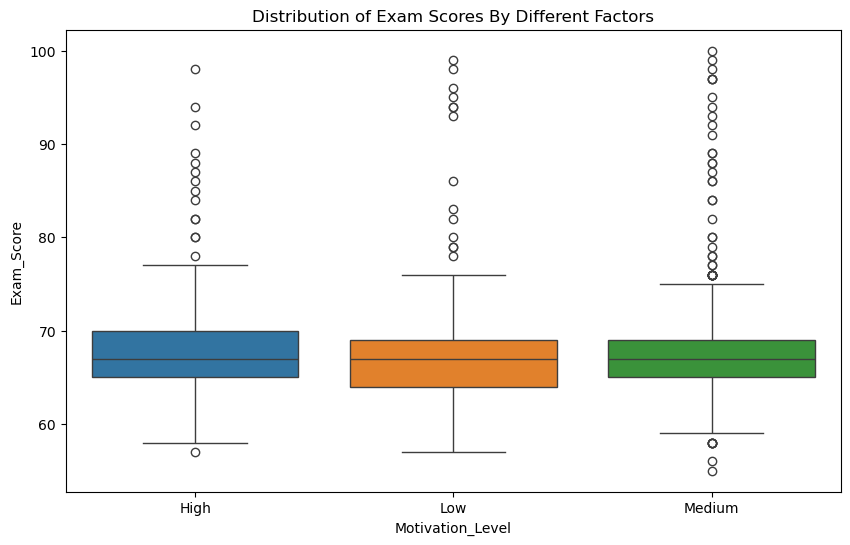

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="Motivation_Level",y="Exam_Score",hue="Motivation_Level")
plt.title("Distribution of Exam Scores By Different Factors")
plt.show()

### Multivariate Analysys Using Pairplot 

<Figure size 1500x1000 with 0 Axes>

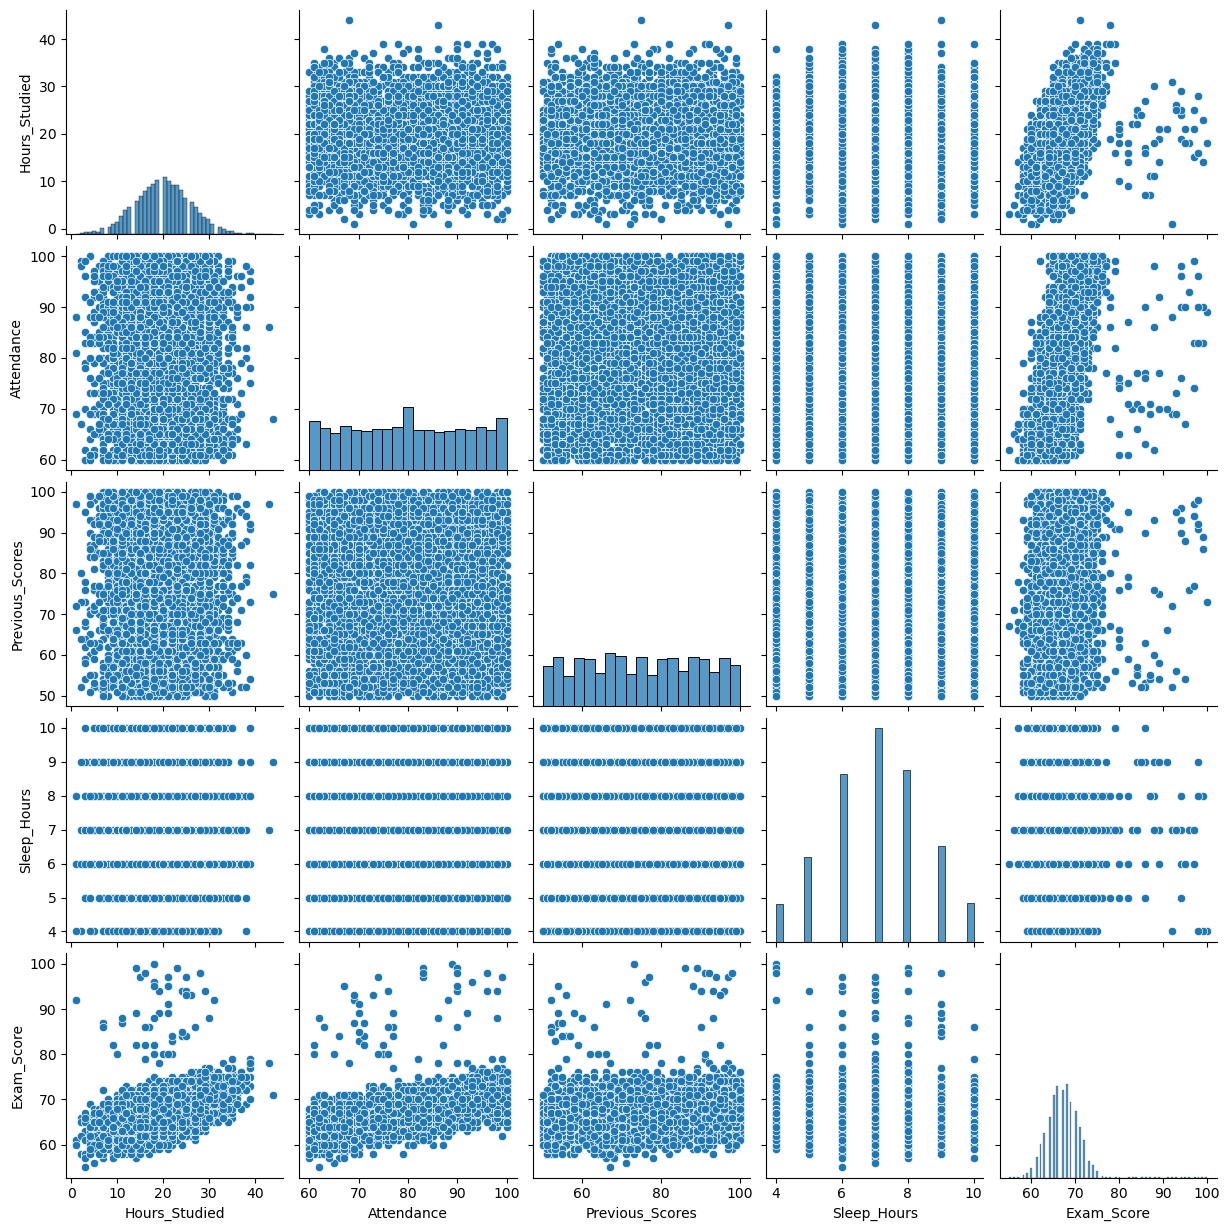

In [36]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Exam_Score']])
plt.show()

### Impact of sleep hours on exam score

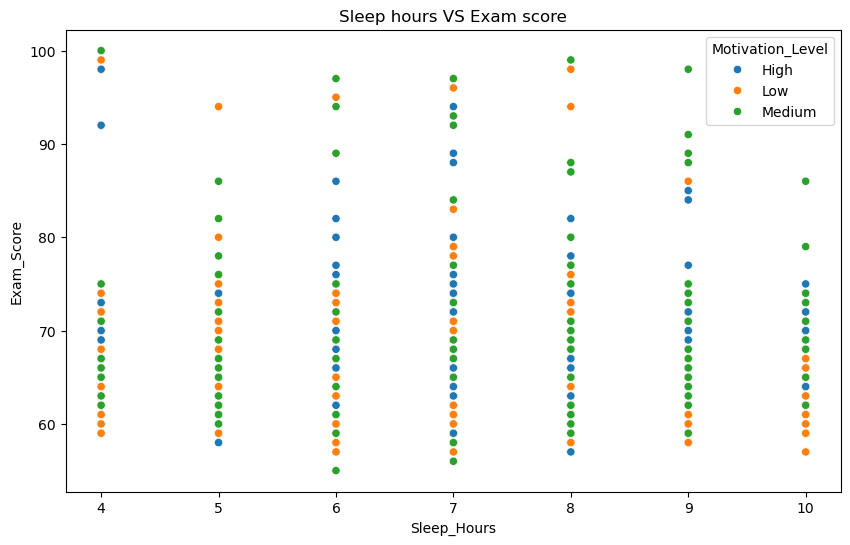

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Sleep_Hours",y="Exam_Score",hue="Motivation_Level")
plt.title("Sleep hours VS Exam score")
plt.show()

### Impact of parental involvement on exam score

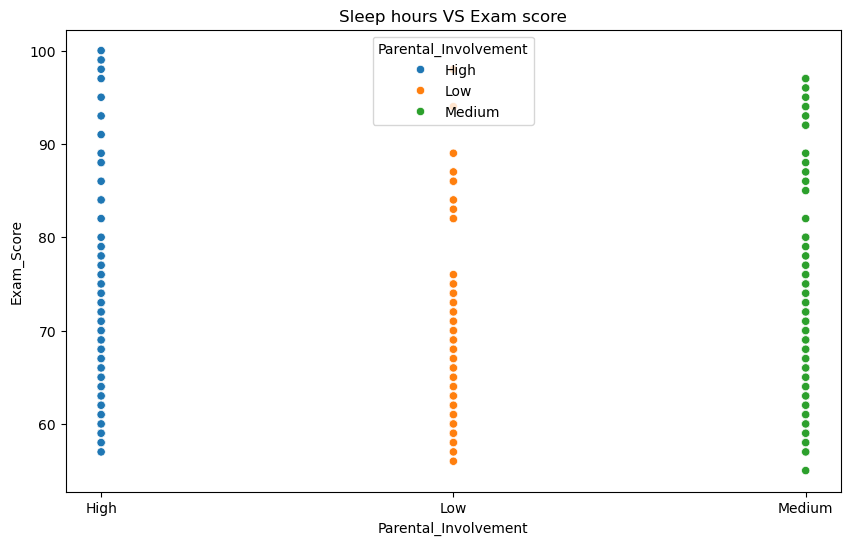

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Parental_Involvement",y="Exam_Score",hue="Parental_Involvement")
plt.title("Sleep hours VS Exam score")
plt.show()

### Cross Tabulation for Categorical Data

In [42]:
ct_table = pd.crosstab(df["School_Type"],df["Parental_Involvement"])
ct_table

Parental_Involvement,High,Low,Medium
School_Type,,,
Private,566,370,1008
Public,1270,920,2243


In [107]:
filtered_df = df.copy()

mapping1 = {"Low" : 1,"Medium" : 2,"High" : 3}
mapping2 = {"Yes" : 1 , "No" : 0}


def map_category_to_numeric(data,col,mapping):
    data[col] = data[col].map(mapping)
    return data

filtered_df = map_category_to_numeric(filtered_df,"Parental_Involvement",mapping1)
filtered_df = map_category_to_numeric(filtered_df,"Access_to_Resources",mapping1)
filtered_df = map_category_to_numeric(filtered_df,"Motivation_Level",mapping1)
filtered_df = map_category_to_numeric(filtered_df,"Family_Income",mapping1)
filtered_df = map_category_to_numeric(filtered_df,"Teacher_Quality",mapping1)
filtered_df = map_category_to_numeric(filtered_df,"Extracurricular_Activities",mapping2)
filtered_df = map_category_to_numeric(filtered_df,"Learning_Disabilities",mapping2)
filtered_df = map_category_to_numeric(filtered_df,"Internet_Access",mapping2)

filtered_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,Public,Positive,3,0,High School,Near,Male,67
1,19,64,1,2,0,8,59,1,1,2,2,2,Public,Negative,4,0,College,Moderate,Female,61
2,24,98,2,2,1,7,91,2,1,2,2,2,Public,Neutral,4,0,Postgraduate,Near,Male,74
3,29,89,1,2,1,8,98,2,1,1,2,2,Public,Negative,4,0,High School,Moderate,Male,71
4,19,92,2,2,1,6,65,2,1,3,2,3,Public,Neutral,4,0,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,2,0,7,76,2,1,1,3,2,Public,Positive,2,0,High School,Near,Female,68
6603,23,76,3,2,0,8,81,2,1,3,1,3,Public,Positive,2,0,High School,Near,Female,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,Public,Negative,2,0,Postgraduate,Near,Female,68
6605,10,86,3,3,1,6,91,3,1,2,1,2,Private,Positive,3,0,High School,Far,Female,68


In [95]:
print(df.groupby(by="School_Type")["Exam_Score"].mean())
print(df.groupby(by="Peer_Influence")["Exam_Score"].mean())
print(df.groupby(by="Parental_Education_Level")["Exam_Score"].mean())
print(df.groupby(by="Distance_from_Home")["Exam_Score"].mean())
print(df.groupby(by="Gender")["Exam_Score"].mean())

School_Type
Private    67.316358
Public     67.216332
Name: Exam_Score, dtype: float64
Peer_Influence
Negative    66.582707
Neutral     67.215631
Positive    67.623433
Name: Exam_Score, dtype: float64
Parental_Education_Level
College         67.358432
High School     66.884104
Postgraduate    67.972656
Name: Exam_Score, dtype: float64
Distance_from_Home
Far         66.498428
Moderate    66.969072
Near        67.513812
Name: Exam_Score, dtype: float64
Gender
Female    67.262179
Male      67.235629
Name: Exam_Score, dtype: float64


/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_6306/307211907.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(by="School_Type")["Exam_Score"].mean())
/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_6306/307211907.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(by="Peer_Influence")["Exam_Score"].mean())
/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_6306/307211907.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

In [109]:
filtered_df.drop(columns=["School_Type","Peer_Influence","Parental_Education_Level","Distance_from_Home","Gender"], inplace=True)
filtered_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Physical_Activity,Learning_Disabilities,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,3,0,67
1,19,64,1,2,0,8,59,1,1,2,2,2,4,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,4,0,74
3,29,89,1,2,1,8,98,2,1,1,2,2,4,0,71
4,19,92,2,2,1,6,65,2,1,3,2,3,4,0,70


<Axes: >

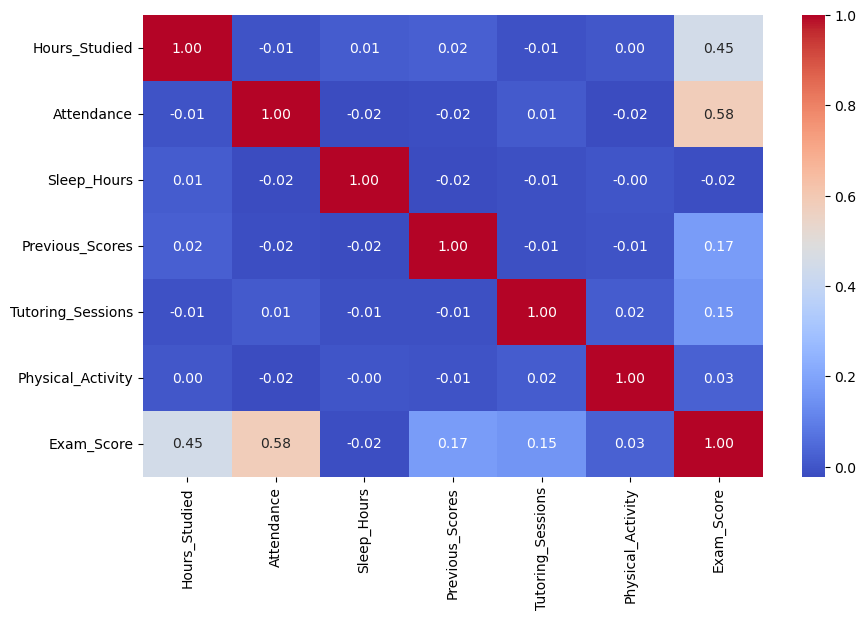

In [119]:
plt.figure(figsize=(10,6))
sns.heatmap(filtered_df.corr(numeric_only=True), annot=True,fmt=".2f", cmap='coolwarm')